In [6]:
%%time
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools 
import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 1.62 s


In [4]:
train_dir = 'C:\\Users\\kotta\\Desktop\\ML Project\\data\\train'
test_dir ='C:\\Users\\kotta\\Desktop\\ML Project\\data\\test'


In [7]:
%%time
def append_ext(fn):
    return fn+".jpg"
traindf = pd.read_csv('C:\\Users\\kotta\\Desktop\\ML Project\\data\\labels.csv',dtype=str)
testdf = pd.read_csv('C:\\Users\\kotta\\Desktop\\ML Project\\data\\sample_submission.csv',dtype=str)
traindf["id"] = traindf["id"].apply(append_ext)
testdf["id"] = testdf["id"].apply(append_ext)

Wall time: 391 ms


In [8]:
traindf.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [9]:
testdf.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
1,00102ee9d8eb90812350685311fe5890.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
4,001a5f3114548acdefa3d4da05474c2e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333


---------------------------TRAINING IMAGES----------------------

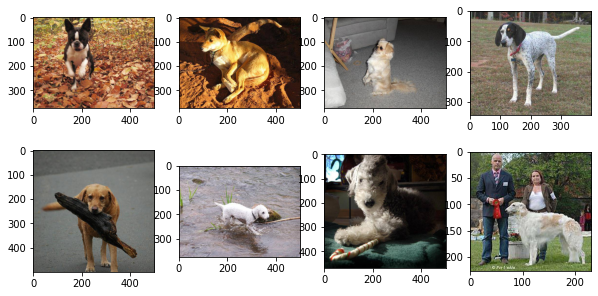

In [14]:
src_path = "C:\\Users\\kotta\\Desktop\\ML Project\\data\\train"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:8])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('on')

---------------DATA PREPROCESSING-------------------

In [15]:
%%time
train_datagen=ImageDataGenerator( rescale=1./255.,                                
                                  horizontal_flip = True,
                                  #Setting validation split to 2% 
                                  validation_split=0.02 
                                  )

Wall time: 0 ns


In [16]:
BATCH_SIZE = 32
image_size=(331,331)

In [17]:
%%time
train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb" 
)

Found 10018 validated image filenames belonging to 120 classes.
Wall time: 1.92 s


In [18]:
x,y = next(train_generator)  #x->image , y->breed

In [19]:
print(type(x))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
(32, 331, 331, 3)
(32, 120)


VALIDATION DATA

In [22]:
valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb")

Found 204 validated image filenames belonging to 120 classes.


TESTING DATA

In [23]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory=test_dir,
x_col="id",
y_col=None,
batch_size=BATCH_SIZE,
seed=42,
shuffle=False,
class_mode=None,
target_size=image_size,
color_mode="rgb")

Found 10357 validated image filenames.


Pretrained model NASNetLarge

In [24]:
shape=(331,331,3)

In [25]:
pretrained_model = tf.keras.applications.NASNetLarge(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
pretrained_model.trainable = False
    
model = tf.keras.Sequential([ 
        pretrained_model,   
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(120, activation='softmax')
    ])

343613440/343610240 [==============================] - 114s 0us/step


In [26]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(optimizer = opt ,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d (Gl (None, 4032)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               483960    
Total params: 85,400,778
Trainable params: 483,960
Non-trainable params: 84,916,818
_________________________________________________________________
C:\Python3.7\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Early stopping

In [27]:
early = tf.keras.callbacks.EarlyStopping( patience=2,
                                          min_delta=0.001,
                                          restore_best_weights=True)

Fitting the Model

In [28]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25,
                    callbacks=[early],)

Epoch 1/25
313/313 [==============================] - 25601s 82s/step - loss: 3.8623 - accuracy: 0.5712 - val_loss: 2.9820 - val_accuracy: 0.8594
Epoch 2/25
313/313 [==============================] - 12975s 42s/step - loss: 2.1272 - accuracy: 0.9080 - val_loss: 1.6315 - val_accuracy: 0.8802
Epoch 3/25
313/313 [==============================] - 8116s 26s/step - loss: 1.1389 - accuracy: 0.9249 - val_loss: 0.9699 - val_accuracy: 0.9115
Epoch 4/25
313/313 [==============================] - 8908s 28s/step - loss: 0.7127 - accuracy: 0.9339 - val_loss: 0.6659 - val_accuracy: 0.9323
Epoch 5/25
313/313 [==============================] - 8763s 28s/step - loss: 0.5247 - accuracy: 0.9362 - val_loss: 0.5076 - val_accuracy: 0.9479
Epoch 6/25
313/313 [==============================] - 8668s 28s/step - loss: 0.4274 - accuracy: 0.9385 - val_loss: 0.4462 - val_accuracy: 0.9323
Epoch 7/25
313/313 [==============================] - 9357s 30s/step - loss: 0.3723 - accuracy: 0.9382 - val_loss: 0.4011 - val_

Loss and Accuracy Curves

In [29]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

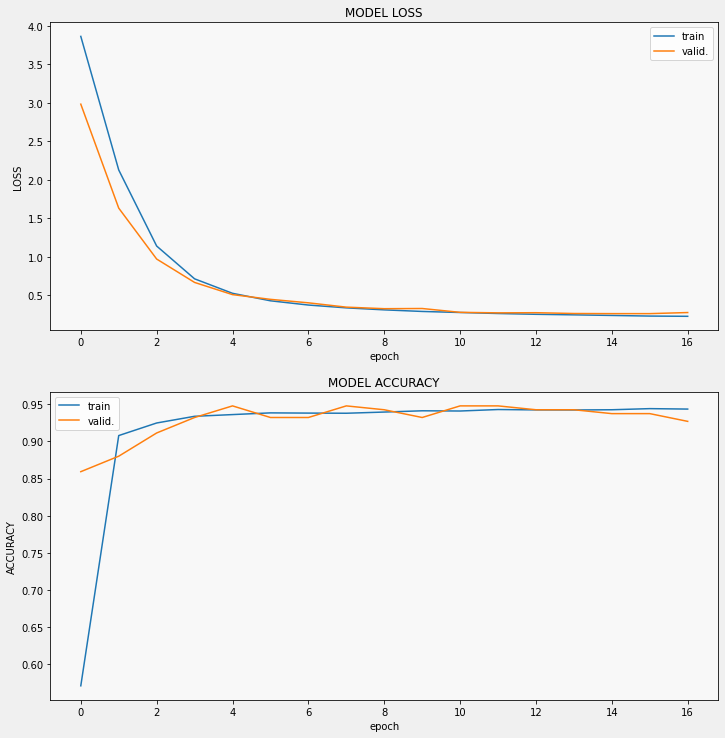

In [30]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)

Accuracy

In [31]:
score = model.evaluate(valid_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

7/7 [==============================] - 202s 22s/step - loss: 0.2621 - accuracy: 0.9412
Accuracy: 94.12%
Loss:  0.26208212971687317


Predicting Test Images

In [34]:
%%time
pred=model.predict(test_generator)

Wall time: 2h 21min 57s


In [33]:
df_submission = pd.read_csv('\\data\\sample_submission.csv')
df_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [35]:
df_submission.iloc[:,1:] = pred
df_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.000220,0.000138,0.000136,0.000095,0.000174,0.000177,0.000128,0.000146,0.000191,...,0.000342,0.000169,0.000148,0.000134,0.000090,0.000138,0.000112,0.000118,0.000201,0.000169
1,00102ee9d8eb90812350685311fe5890,0.000131,0.000070,0.000078,0.000070,0.000120,0.000192,0.000084,0.000133,0.000071,...,0.000164,0.000138,0.000109,0.000130,0.000159,0.000084,0.000213,0.000147,0.000079,0.000136
2,0012a730dfa437f5f3613fb75efcd4ce,0.000078,0.000571,0.000256,0.000141,0.000158,0.000137,0.000128,0.000128,0.000104,...,0.000160,0.000119,0.000197,0.000148,0.000309,0.000512,0.000092,0.000295,0.000175,0.000094
3,001510bc8570bbeee98c8d80c8a95ec1,0.002833,0.001148,0.000571,0.000397,0.001829,0.002943,0.000520,0.001147,0.000648,...,0.000829,0.001437,0.000969,0.000429,0.001237,0.000570,0.000398,0.004331,0.000265,0.001211
4,001a5f3114548acdefa3d4da05474c2e,0.021166,0.000971,0.001006,0.000601,0.000620,0.001660,0.000908,0.000665,0.000927,...,0.001656,0.001145,0.000736,0.000548,0.000793,0.000367,0.000463,0.001197,0.000408,0.001948


Submission

In [43]:
%%time
final_df = df_submission.set_index('id')
final_df.to_csv('.\\data\\submission.csv')

Wall time: 5.06 s


In [44]:
Y_pred=model.predict(valid_generator)   #204 images
y_pred=np.argmax(Y_pred, axis=1)
y_pred

array([ 58,  50,   2,  97,  26,  12,  80,  11, 118,  58,   0,  19,  68,
         1,  92, 113,  26, 115,  25,  92,  97,  17,  25,  10,  36,  27,
        82, 101, 118, 106,  17, 102,  70,  54,  57,  40, 110,   7,  48,
         2, 111,  84,  59,  67, 100,  18,  85,  69,  15,  96,  40,   3,
        10,  75,  17,  60,  42,  48,   0,  24,  68,  44,  68,   4,  70,
        29,  11,   0,  95,  94,  42, 110,  40,  77,  58,  49,  77,   4,
        93,  37,  83,  54,  56,  38, 115,  14, 109,  57,   8,  24,  37,
        84,  16,  73,  69, 113,  49,  90, 113,  52,  55,  73,  89, 101,
        33,  10, 113,  97,  80,  46,   9,  16,  14, 101,  93,  56,  54,
       114,  68,  40,   5,  66,   2,  31,  56,  94,  37,  15,  14,  83,
        53,  90,  24,  85,  15,  48, 100,  30,  72,  21,  74,   4,  10,
       113, 106,  71,  63,  40,  67,  56,   3,  72,  12,  77, 103,  90,
        53,  88,  21,  26, 101,  36,   0,   5,  18,  17,  83,  25,  79,
         7,  16,  88,  77,  46,  57,  37,  96,   3,  65, 114,  5

In [45]:
y_pred=np.argmax(pred,axis=1)
y_pred

array([61, 94, 40, ..., 36, 70, 59], dtype=int64)

In [46]:
model.save("history")

C:\Python3.7\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
INFO:tensorflow:Assets written to: history\assets
INFO:tensorflow:Assets written to: history\assets
